In [284]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from sinkhorn_knopp import sinkhorn_knopp as skp
import random
sk = skp.SinkhornKnopp()


def SGM(A,B,W1,W2):
    
    
    
    n_vert = A.shape[0] #number of vertices in graphs
    m = len(W1)
    n = n_vert-m
    pr = [x for x in range(n_vert) if x not in W1]
    pr = W1+pr
    pc = [x for x in range(n_vert) if x not in W2]
    pc = W2+pc
    Pr = np.zeros((n_vert,n_vert))
    Pc = np.zeros((n_vert,n_vert))
    Pr[list(range(n_vert)),pr]=1
    Pc[list(range(n_vert)),pc]=1
    A = Pr@A@np.transpose(Pr)
    B = Pc@B@np.transpose(Pc)
    A11 = A[:m,:m]
    A12 = A[:m,m:]
    A21 = A[m:,:m]
    A22 = A[m:,m:]
    B11 = B[:m,:m]
    B12 = B[:m,m:]
    B21 = B[m:,:m]
    B22 = B[m:,m:]
    A11T = np.transpose(A11)
    A12T = np.transpose(A12)
    A22T = np.transpose(A22)
    B21T = np.transpose(B21)
    B22T = np.transpose(B22)
    
    P = np.ones((n,n))/float(n)
    const_sum = A21@np.transpose(B21) + np.transpose(A12)@B12
    ite = 0
    stop = 1
    for i in range(30):
    #while(stop > 0.001 and ite < 50):
        PT = np.transpose(P)
        delfp = const_sum + A22@P@B22T + A22T@P@B22  # computing the gradient of f(P) = -tr(APB^tP^t)
        rows, cols = linear_sum_assignment(delfp) # run hungarian algorithm on gradient(f(P))
        Q = np.zeros((n,n))  
        Q[rows,cols] = 1   # initialize search direction matrix Q

        def f(x):  #computing the original optimization function
            return np.trace(A11T@B11) + np.trace(np.transpose(x*P+(1-x)*Q)@A21@B21T) + np.trace(np.transpose(x*P+(1-x)*Q)@A12T@B12) + np.trace(A22T@(x*P+(1-x)*Q)@B22@np.transpose(x*P+(1-x)*Q)) 
        alpha = minimize_scalar(f, bounds=(0,1), method='bounded').x #computing the step size
        P_i1 = alpha*P + (1-alpha)*Q  # Update P
                #end of FW optimization loop
        stop = np.linalg.norm(P_i1-P)
        P = P_i1
        ite += 1
    row, perm_inds_new = linear_sum_assignment(-P)
    Pf = np.zeros((n,n))
    Pf[rows,cols] = 1   # project onto set of permutation matrices
    Pf1 = np.identity(n_vert)
    Pf1[m:,m:] = Pf
    return ofv(A,B,Pf1)
    
    

    


In [27]:
with open('qapdata/chr12c.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]

def ofv(A,B,P): #function to calculate objective function value based on permutation matrix
    return np.trace(np.transpose(A)@P@B@np.transpose(P))
def testSGM(num): #testing function where input is number of iterations
    oofv = np.zeros(num)
    for i in range(num):
        Pi = SGM(A,B,[],[])
        oofv[i] = ofv(A,B,Pi)
        
    return min(oofv)

In [273]:
import random
with open('qapdata/chr12c.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([7,5,1,3,10,4,8,6,9,11,2,12])-[1]*n

def SGMtest(A,B,pi):
    n = A.shape[0]
    for m in range(1,5):
        ofvs = [0]*30
        for i in range(30):
            x = list(np.sort(random.sample(list(range(n)),m)))
            y = [pi[z] for z in x]
            ofvs[i] = SGM(A,B,x,y)
        print(np.mean(ofvs))

def SGMtest2(A,B,pi):
    n = A.shape[0]
    for m in range(n-2,n):
        ofvs = [0]*30
        for i in range(30):
            x = list(np.sort(random.sample(list(range(n)),m)))
            y = [pi[z] for z in x]
            ofvs[i] = SGM(A,B,x,y)
        print(np.mean(ofvs))

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

21388.933333333334
16945.4
16437.933333333334
14902.866666666667
11156.0
11156.0


In [274]:
with open('qapdata/chr15a.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([5,10,8,13,12,11,14,2,4,6,7,15,3,1,9])-[1]*n

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

17642.533333333333
16350.066666666668
14359.533333333333
14656.466666666667
9896.0
9896.0


In [277]:
with open('qapdata/chr15c.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([13,2,5,7,8,1,14,6,4,3,15,9,12,11,10])-[1]*n

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

19007.4
18683.0
14866.133333333333
14665.733333333334
9504.0
9504.0


In [278]:
with open('qapdata/chr20b.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([20,3,9,7,1,12,16,6,8,14,10,4,5,13,17,2,18,11,19,15])-[1]*n

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

4043.4666666666667
3784.9333333333334
3743.4
3604.733333333333
2298.0
2298.0


In [305]:
with open('qapdata/chr22b.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([10,19,3,1,20,2,6,4,7,8,17,12,11,15,21,13,9,5,22,14,18,16])-[1]*n

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

8921.066666666668
8375.066666666668
7989.466666666666
7879.533333333334
6194.0
6194.0


In [271]:
import random
with open('qapdata/esc16b.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([6,3,7,5,13,1,15,2,4,11,9,14,10,12,8,16])-[1]*n

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

295.53333333333336
295.2
295.2
294.3333333333333
292.0
292.0


In [285]:
with open('qapdata/rou12.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([6,5,11,9,2,8,3,1,12,7,4,10])-[1]*n

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

253937.53333333333
245830.53333333333
242340.46666666667
240811.73333333334
235528.0
235528.0


In [288]:
with open('qapdata/rou15.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([12,6,8,13,5,3,15,2,7,1,9,10,4,14,11])-[1]*n

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

375121.6666666667
369342.86666666664
363281.8
363082.4
354210.0
354210.0


In [289]:
with open('qapdata/rou20.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([1,19,2,14,10,16,11,20,9,5,7,4,8,18,15,3,12,17,13,6])-[1]*n

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

752251.7333333333
762232.7333333333
751685.2666666667
751802.2
725522.0
725522.0


In [294]:
with open('qapdata/tai15a.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([5,10,4,13,2,9,1,11,12,14,7,15,3,8,6])-[1]*n

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

414492.6
413389.3333333333
411640.2
397082.13333333336
388214.0
388214.0


In [307]:
with open('qapdata/tai17a.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([12,2,6,7,4,8,14,5,11,3,16,13,17,9,1,10,15])-[1]*n

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

531485.4
521699.6
514663.2
513211.2
491812.0
491812.0


In [298]:
with open('qapdata/tai20a.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([10,9,12,20,19,3,14,6,17,11,5,7,15,16,18,2,4,8,13,1])-[1]*n

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

751039.6
748957.5333333333
735432.0666666667
723134.7333333333
703482.0
703482.0


In [300]:
with open('qapdata/tai30a.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([19, 18, 4, 24, 30, 25, 5, 7, 1, 22, 28, 20, 11,13, 9, 16, 8, 10, 17, 21, 12, 29, 2, 15, 3, 14, 26, 27, 23, 6])-[1]*n

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

1899905.8666666667
1881029.8666666667
1886237.6666666667
1876745.6
1818146.0
1818146.0


In [301]:
with open('qapdata/tai35a.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])   
n = int(math.sqrt(len(f)/2))

f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
pi = np.array([19,9,28,12,7,33,13,26,5,2,31,16,24,27,22,15,3,30,29,11,6,25,21,23,34,20,18,4,10,1,14,8,32,35,17])-[1]*n

SGMtest(A,B,pi)
SGMtest2(A,B,pi)

2524702.7333333334
2519673.8
2520130.1333333333
2502065.3333333335
2422002.0
2422002.0


In [254]:

Pi = np.zeros((5,5))
Pr= np.zeros((5,5))
Pc = np.zeros((5,5))
Pi[list(range(5)),[3,1,4,0,2]]=1
Pr[list(range(5)),[2,3,0,1,4]] =1
Pc[list(range(5)),[4,0,3,1,2]] = 1
print(np.transpose(Pc)@Pc)
print(Pi)
print(np.transpose(Pc)@np.identity(5)@Pc)
print(Pr@Pi@np.transpose(Pc))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [293]:
x = list(np.sort(random.sample(list(range(n)),3)))
y = [pi[z] for z in x]
print(np.sum(SGM(A,B,x,y)))


400700.0


In [313]:
chr12c_a = [21389,16945,16438,14903]
chr12c_f = [19770,16298,16221,14504]
chr15a_a = [17642.533333333333, 16350.066666666668, 14359.533333333333 , 14656.466666666667]
chr15a_f = [15813, 16280,15861, 14399]
chr15c_f = [18230 , 15649 , 15494 , 14027 ]
chr20b_f = [3555 , 3585 , 3540 , 3556 ]
chr22b_f = [8359 , 8184 , 8021 , 7673 ]
esc16b_f = [293 , 295 , 294 , 293]
rou12_f = [250799 , 242999 , 236993 , 236432]
rou15_f = [369198 , 361721 , 357969 , 356537]
rou20_f = [748128 , 753645 , 746137 , 743474 ]
tai15a_f = [403314 , 402760 , 398765 , 396544]
tai17a_f = [518678 , 506259 , 506159 , 502410]
tai20a_f = [736797 , 739771 , 735472 , 716565]
tai30a_f = [1888526 , 1878886 , 1874521 , 1865151]
tai35a_f = []
tai40a_f = []
chr15c_a = [19007.4,18683.0,14866.133333333333,14665.733333333334]
chr20b_a = [4043.4666666666667,3784.9333333333334,3743.4,3604.733333333333]
chr22b_a = [8921.066666666668,8375.066666666668,7989.466666666666,7879.533333333334]
esc16b_a = []
rou12_a = []
rou15_a = []
rou20_a = []
tai15a_a = []
tai17a_a = []
tai20a_a = []
tai30a_a = []
tai35a_a = []
tai40a_a = []

In [357]:
import matplotlib.pyplot as plt

labels = ['1','2','3','4']
optimal = 11156
chr12c = [(chr12c_a[x]-optimal)/optimal - (chr12c_f[x]-optimal)/optimal for x in range(len(chr12c_a))]
optimal = 9896
chr15a = [(chr15a_a[x]-optimal)/optimal - (chr15a_f[x]-optimal)/optimal for x in range(len(chr15a_a))]
optimal = 9504
chr15c = [(chr15c_a[x]-optimal)/optimal - (chr15c_f[x]-optimal)/optimal for x in range(len(chr15c_a))]
optimal = 2298
chr20b = [(chr20b_a[x]-optimal)/optimal - (chr20b_f[x]-optimal)/optimal for x in range(len(chr20b_a))]
optimal = 6194
chr22b = [(chr22b_a[x]-optimal)/optimal - (chr22b_f[x]-optimal)/optimal for x in range(len(chr22b_a))]






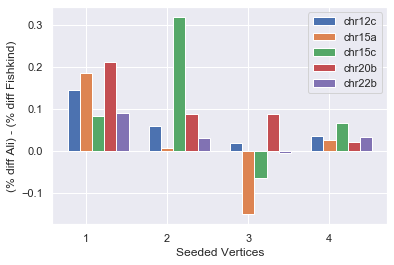

In [358]:
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

# set width of bar
barWidth = 0.15
 
# Set position of bar on X axis
r1 = np.arange(len(chr12c))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
plt.bar(r1, chr12c, width=barWidth, edgecolor='white', label='chr12c')
plt.bar(r2, chr15a, width=barWidth, edgecolor='white', label='chr15a')
plt.bar(r3, chr15c, width=barWidth, edgecolor='white', label='chr15c')
plt.bar(r4, chr20b, width=barWidth, edgecolor='white', label='chr20b')
plt.bar(r5, chr22b,  width=barWidth, edgecolor='white', label='chr22b')


# Add xticks on the middle of the group bars
plt.xlabel('Seeded Vertices')
plt.ylabel('(% diff Ali) - (% diff Fishkind)')
plt.xticks([r + barWidth for r in range(len(chr12c))], labels)
 
plt.legend()
plt.show()




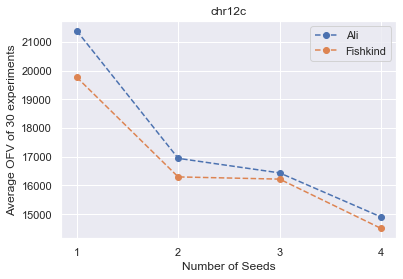

In [350]:
plt.plot(labels, chr12c_a, linestyle='dashed',marker = 'o', label = "Ali"  )
plt.plot(labels, chr12c_f, linestyle='dashed',marker = 'o', label = "Fishkind"  )

plt.xlabel('Number of Seeds')
plt.ylabel ('Average OFV of 30 experiments')
plt.title('chr12c')
plt.legend()

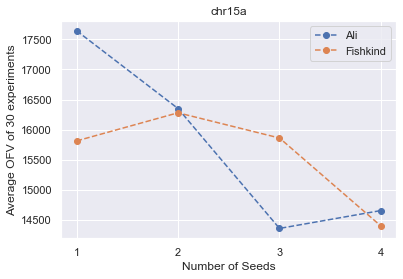

In [351]:
plt.plot(labels,chr15a_a, linestyle='dashed',marker = 'o', label = "Ali"  )
plt.plot(labels,chr15a_f, linestyle='dashed',marker = 'o', label = "Fishkind"  )

plt.xlabel('Number of Seeds')
plt.ylabel ('Average OFV of 30 experiments')
plt.title('chr15a')
plt.legend()

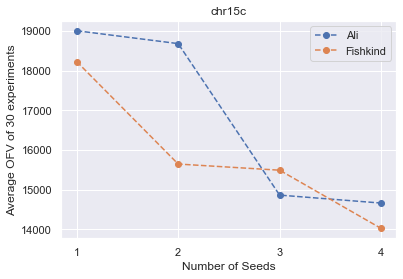

In [352]:
plt.plot(labels,chr15c_a, linestyle='dashed',marker = 'o', label = "Ali"  )
plt.plot(labels,chr15c_f, linestyle='dashed',marker = 'o', label = "Fishkind"  )

plt.xlabel('Number of Seeds')
plt.ylabel ('Average OFV of 30 experiments')
plt.title('chr15c')
plt.legend()

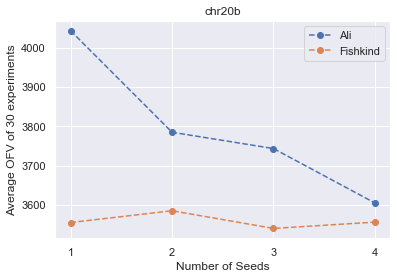

In [353]:
plt.plot(labels,chr20b_a, linestyle='dashed',marker = 'o', label = "Ali"  )
plt.plot(labels,chr20b_f, linestyle='dashed',marker = 'o', label = "Fishkind"  )

plt.xlabel('Number of Seeds')
plt.ylabel ('Average OFV of 30 experiments')
plt.title('chr20b')
plt.legend()

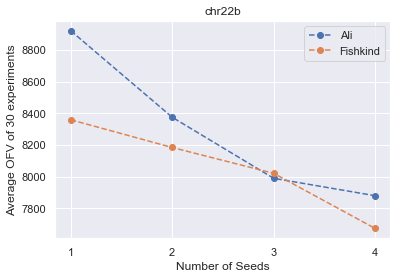

In [354]:
plt.plot(labels,chr22b_a, linestyle='dashed',marker = 'o', label = "Ali"  )
plt.plot(labels,chr22b_f, linestyle='dashed',marker = 'o', label = "Fishkind"  )

plt.xlabel('Number of Seeds')
plt.ylabel ('Average OFV of 30 experiments')
plt.title('chr22b')
plt.legend()